# Permutation Feature Importance

In this notebook, we will evaluate feature importance by permutation, using Scikit-learn, Eli5 and Feature-engine.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from feature_engine.selection import (
    SmartCorrelatedSelection,
    SelectByShuffling,
)

In [2]:
variables = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
             'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF',
             '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
             'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
             'MoSold', 'YrSold', 'SalePrice']

In [3]:
# load dataset

data = pd.read_csv('../../houseprice.csv', usecols=variables)

data.shape

(1460, 34)

In [4]:
# separate train and test sets

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 33), (438, 33))

## Random Forests

In [5]:
# Train Random Forests

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    random_state=2909,)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=2909)

In [6]:
# R2 in train set

rf.score(X_train, y_train)

0.8078308037529935

In [7]:
# R2 in test set

rf.score(X_test, y_test)

0.780510833461595

## Tree derived feature importance

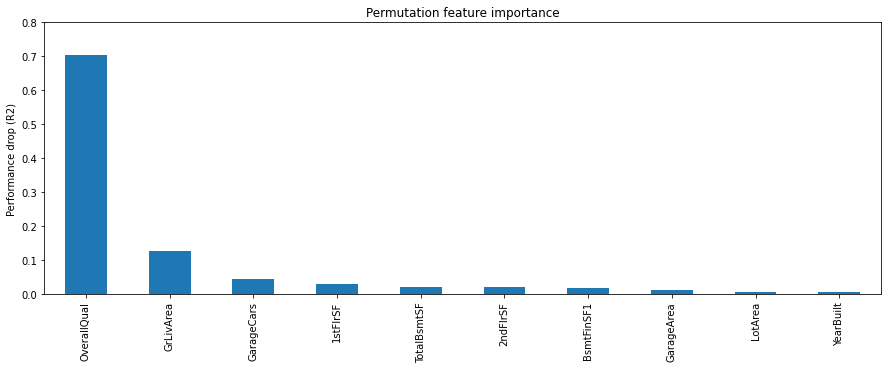

In [8]:
# 10 most important features

pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_,
).sort_values(
    ascending=False
).head(10).plot.bar(figsize=(15, 5))

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.ylim(0, 0.8)
plt.show()

## Permutation Feature Importance

In [9]:
sel = SelectByShuffling(
    variables=None, # automatically examine all numerical variables
    estimator=rf, # the ML model
    scoring='r2', # the metric to evaluate
    threshold=0.01,# the maximum performance drop allowed to select the feature
    cv=3, # cross-validation
    random_state=1 # seed
)

sel.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestRegressor(max_depth=3,
                                                  random_state=2909),
                  random_state=1, scoring='r2', threshold=0.01)

In [10]:
# full model performance

sel.initial_model_performance_

0.7606492527531618

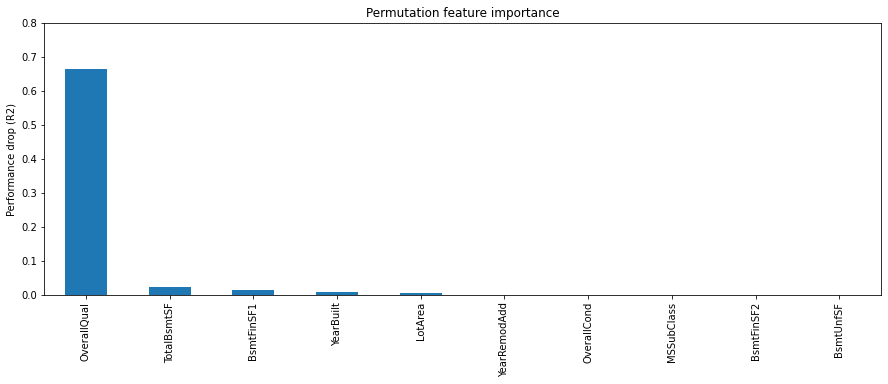

In [11]:
# 10 most important features

pd.Series(sel.performance_drifts_).head(10).sort_values(
    ascending=False).plot.bar(figsize=(15, 5))

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.ylim(0, 0.8)
plt.show()

## Correlation

In [12]:
# Find correlated features

corr = SmartCorrelatedSelection(
    threshold=0.7, 
    selection_method="variance",
)

corr.fit(X_train, y_train)

SmartCorrelatedSelection(selection_method='variance', threshold=0.7)

In [13]:
# the fatures to drop

corr.features_to_drop_

['1stFlrSF', '2ndFlrSF', 'GarageCars']

In [14]:
corr.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageArea', 'GarageCars'}]

In [15]:
# remove features

X_train = corr.transform(X_train)
X_test = corr.transform(X_test)

## Re-train random forest

In [16]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=2909)

In [17]:
# R2 in train set

rf.score(X_train, y_train)

0.8049068680033922

In [18]:
# R2 in test set

rf.score(X_test, y_test)

0.7624515195322404

## New tree importance

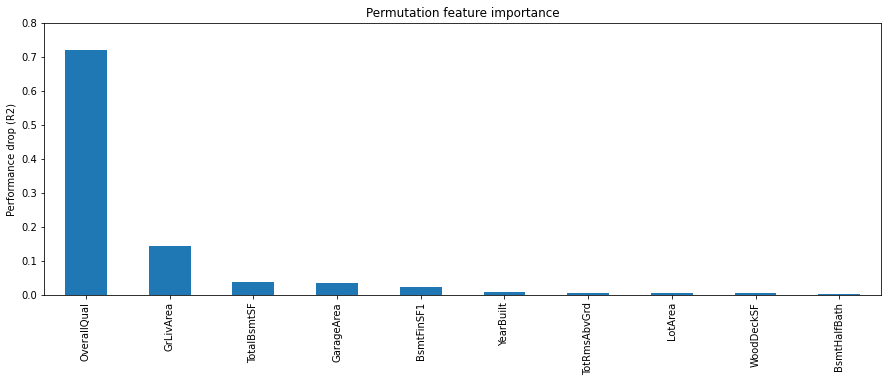

In [19]:
# 10 most important features

pd.Series(
    rf.feature_importances_,
    index=rf.feature_names_in_,
).sort_values(
    ascending=False
).head(10).plot.bar(figsize=(15, 5))

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.ylim(0, 0.8)
plt.show()

## New permutation importance

In [20]:
sel = SelectByShuffling(
    variables=None, # automatically examine all numerical variables
    estimator=rf, # the ML model
    scoring='r2', # the metric to evaluate
    threshold=0.01,# the maximum performance drop allowed to select the feature
    cv=3, # cross-validation
    random_state=1 # seed
)


sel.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestRegressor(max_depth=3,
                                                  random_state=2909),
                  random_state=1, scoring='r2', threshold=0.01)

In [21]:
# full model performance

sel.initial_model_performance_

0.7496071159750558

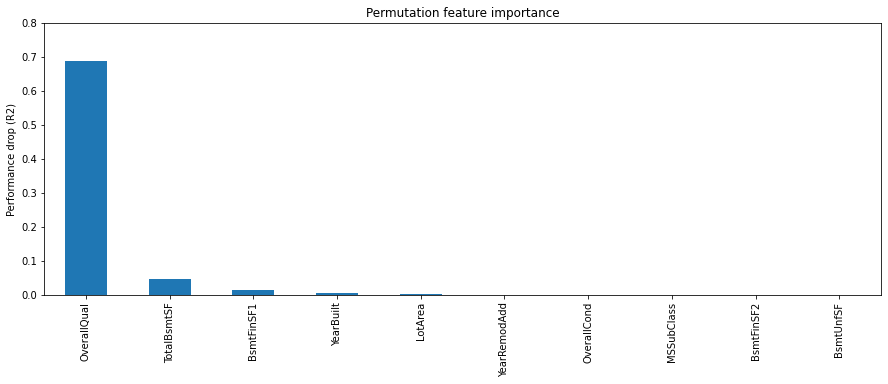

In [22]:
# 10 most important features

pd.Series(sel.performance_drifts_).head(10).sort_values(
    ascending=False).plot.bar(figsize=(15, 5))

plt.title("Permutation feature importance")
plt.ylabel("Performance drop (R2)")
plt.ylim(0, 0.8)
plt.show()

The performance of the remaining features increases a little. The overall model performance does not change much.